In [2]:
# importing warnings
!pip install --upgrade scikit-learn==1.3.2
import warnings
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Read dataset from csv file
data =  pd.read_csv("dataset-1.csv")
data

,Marital status,Application mode,Course,Previous qualification,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st year (enrolled),Curricular units 1st year (approved),Curricular units 2nd year (enrolled),Curricular units 2nd year (approved),Curricular units 3rd year (enrolled),Curricular units 3rd year (approved),Curricular units 4th year (enrolled),Curricular units 4th year (approved),Target
0,1,8,2,1,1,0,1,1,0,20,0,0,0,0,0,0,0,0,Dropout
1,1,6,11,1,1,0,0,1,0,19,6,6,6,6,6,6,6,6,Graduate
2,1,1,5,1,1,0,0,1,0,19,6,0,6,0,6,0,6,0,Dropout
3,1,8,15,1,1,0,1,0,0,20,6,6,6,5,6,6,6,5,Graduate
4,2,12,3,1,0,0,1,0,0,45,6,5,6,6,6,5,6,6,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,15,1,0,0,1,1,0,19,6,5,6,5,6,5,6,5,Graduate
4420,1,1,15,1,1,1,0,0,0,18,6,6,6,2,6,6,6,2,Dropout
4421,1,1,12,1,1,0,1,0,1,30,7,7,8,1,7,7,8,1,Dropout
4422,1,1,9,1,1,0,1,0,1,20,5,5,5,5,5,5,5,5,Graduate


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Marital status                        4424 non-null   int64 
 1   Application mode                      4424 non-null   int64 
 2   Course                                4424 non-null   int64 
 3   Previous qualification                4424 non-null   int64 
 4   Displaced                             4424 non-null   int64 
 5   Debtor                                4424 non-null   int64 
 6   Tuition fees up to date               4424 non-null   int64 
 7   Gender                                4424 non-null   int64 
 8   Scholarship holder                    4424 non-null   int64 
 9   Age at enrollment                     4424 non-null   int64 
 10  Curricular units 1st year (enrolled)  4424 non-null   int64 
 11  Curricular units 1st year (app

In [6]:
data.isnull().sum()

Marital status                          0
Application mode                        0
Course                                  0
Previous qualification                  0
Displaced                               0
Debtor                                  0
Tuition fees up to date                 0
Gender                                  0
Scholarship holder                      0
Age at enrollment                       0
Curricular units 1st year (enrolled)    0
Curricular units 1st year (approved)    0
Curricular units 2nd year (enrolled)    0
Curricular units 2nd year (approved)    0
Curricular units 3rd year (enrolled)    0
Curricular units 3rd year (approved)    0
Curricular units 4th year (enrolled)    0
Curricular units 4th year (approved)    0
Target                                  0
dtype: int64

In [7]:
data['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [8]:

#Drop all columns except that for Dropout

data = data[data['Target'] != 'Enrolled']
data = data.replace({'Target': {'Dropout': 0, 'Graduate': 1}})
data

,Marital status,Application mode,Course,Previous qualification,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st year (enrolled),Curricular units 1st year (approved),Curricular units 2nd year (enrolled),Curricular units 2nd year (approved),Curricular units 3rd year (enrolled),Curricular units 3rd year (approved),Curricular units 4th year (enrolled),Curricular units 4th year (approved),Target
0,1,8,2,1,1,0,1,1,0,20,0,0,0,0,0,0,0,0,0
1,1,6,11,1,1,0,0,1,0,19,6,6,6,6,6,6,6,6,1
2,1,1,5,1,1,0,0,1,0,19,6,0,6,0,6,0,6,0,0
3,1,8,15,1,1,0,1,0,0,20,6,6,6,5,6,6,6,5,1
4,2,12,3,1,0,0,1,0,0,45,6,5,6,6,6,5,6,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,15,1,0,0,1,1,0,19,6,5,6,5,6,5,6,5,1
4420,1,1,15,1,1,1,0,0,0,18,6,6,6,2,6,6,6,2,0
4421,1,1,12,1,1,0,1,0,1,30,7,7,8,1,7,7,8,1,0
4422,1,1,9,1,1,0,1,0,1,20,5,5,5,5,5,5,5,5,1


In [9]:
data.shape

(3630, 19)

In [10]:
data.describe()

,Marital status,Application mode,Course,Previous qualification,Displaced,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Curricular units 1st year (enrolled),Curricular units 1st year (approved),Curricular units 2nd year (enrolled),Curricular units 2nd year (approved),Curricular units 3rd year (enrolled),Curricular units 3rd year (approved),Curricular units 4th year (enrolled),Curricular units 4th year (approved),Target
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000
mean,1.184298,6.810193,9.935537,2.552617,0.549036,0.113774,0.866116,0.344077,0.266942,23.461157,6.337466,4.791460,6.296419,4.518457,6.337466,4.791460,6.296419,4.518457,0.608540
std,0.613009,5.253618,4.340715,3.952440,0.497658,0.317580,0.340575,0.475132,0.442423,7.827994,2.570773,3.237845,2.263020,3.162376,2.570773,3.237845,2.263020,3.162376,0.488144
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,6.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,5.000000,3.000000,5.000000,2.000000,5.000000,3.000000,5.000000,2.000000,0.000000
50%,1.000000,8.000000,11.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,20.000000,6.000000,5.000000,6.000000,5.000000,6.000000,5.000000,6.000000,5.000000,1.000000
75%,1.000000,12.000000,13.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,25.000000,7.000000,6.000000,7.000000,6.000000,7.000000,6.000000,7.000000,6.000000,1.000000
max,6.000000,18.000000,17.000000,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,26.000000,26.000000,23.000000,20.000000,26.000000,26.000000,23.000000,20.000000,1.000000


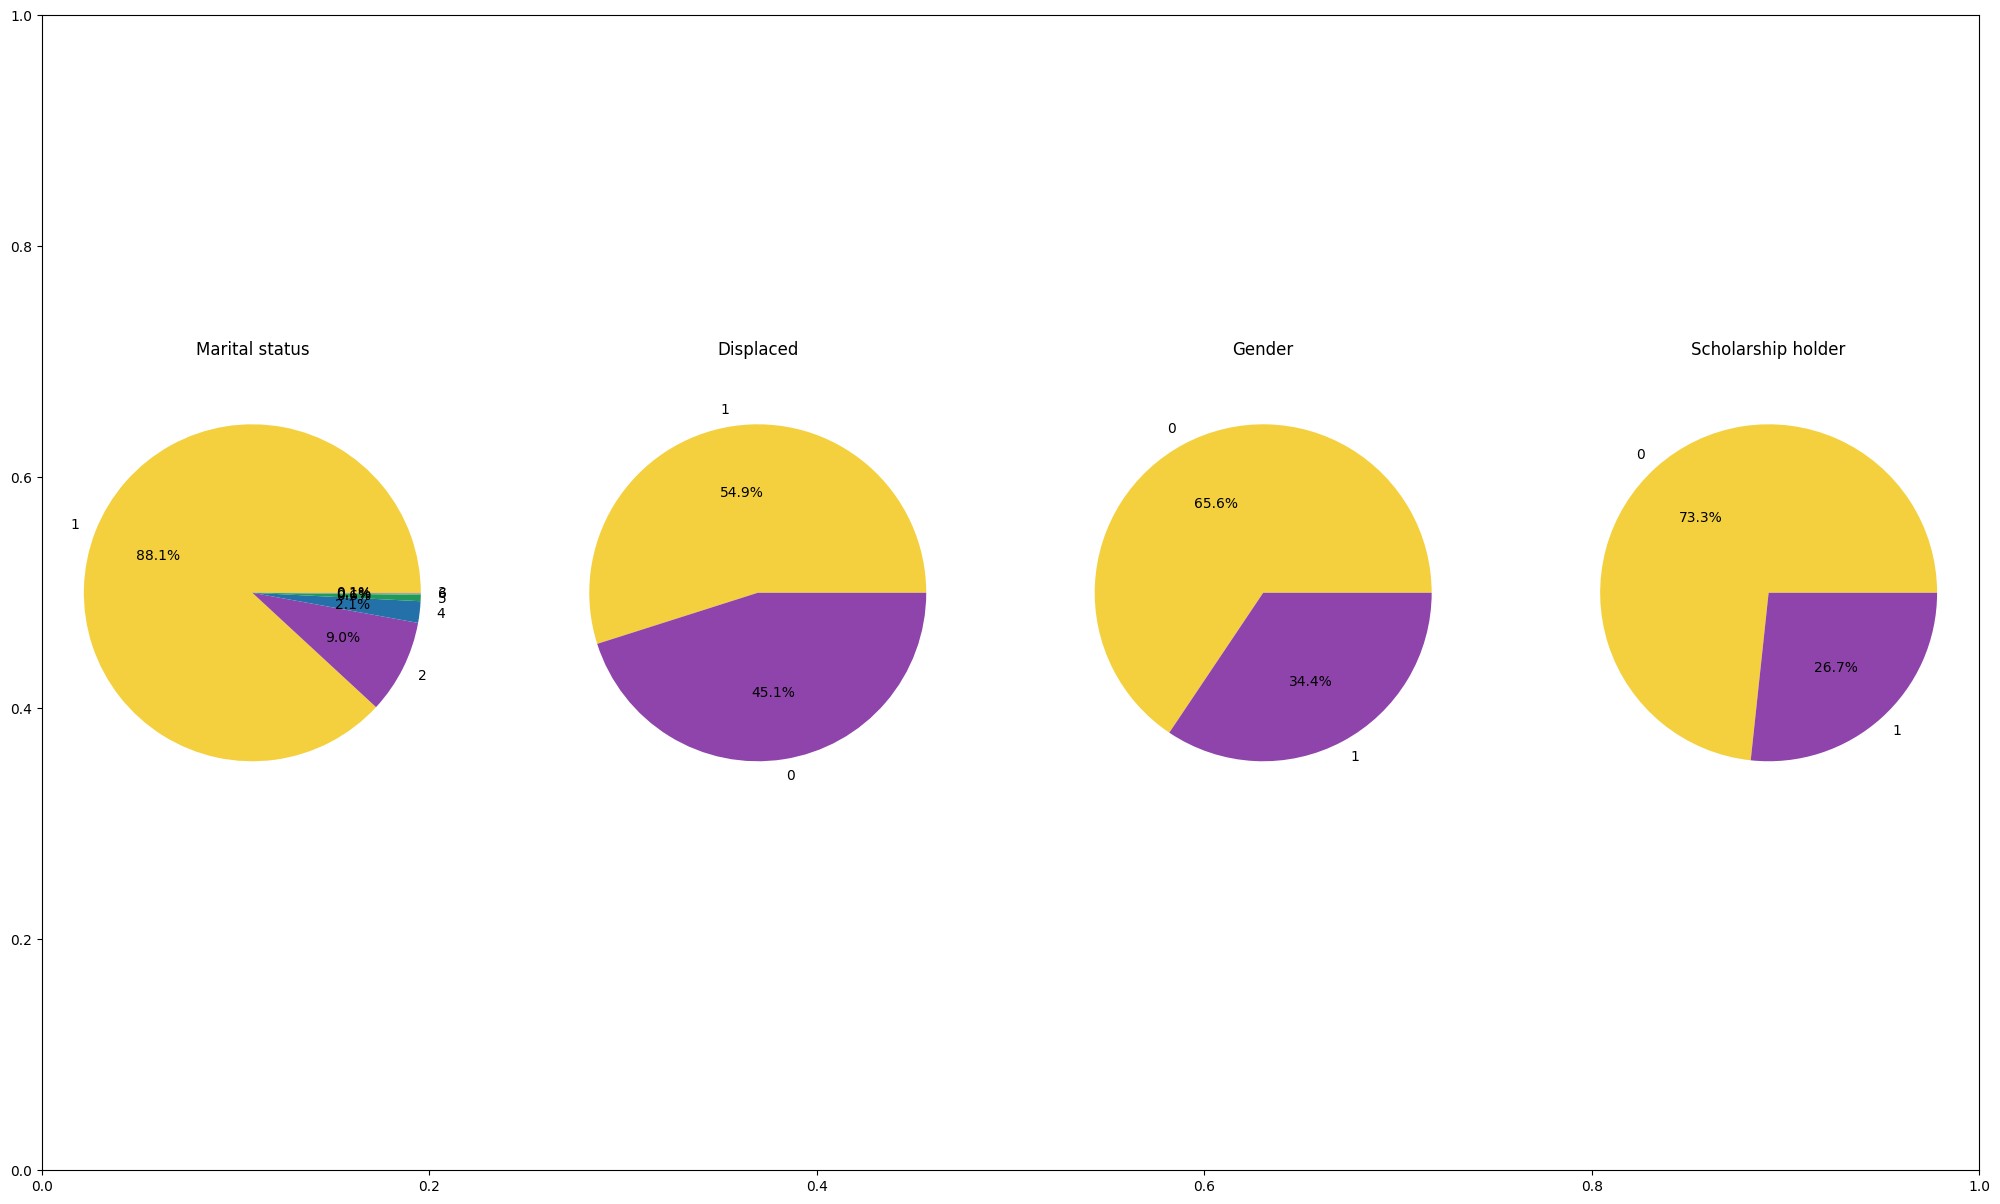

In [11]:
attributes=['Marital status','Displaced','Gender','Scholarship holder']
colors=['#F4D03E','#8E44AA','#2471A9','#229959','#46b078','#EC7065']
plt.subplots(figsize=(25,15))
for i,j in enumerate(attributes):
  plt.subplot(1,4,i+1)

  x=data[j].value_counts()
  plt.pie(x.values,labels=x.index,autopct='%1.1f%%', colors=colors)
  plt.title(j,pad=20)
plt.show()

[]

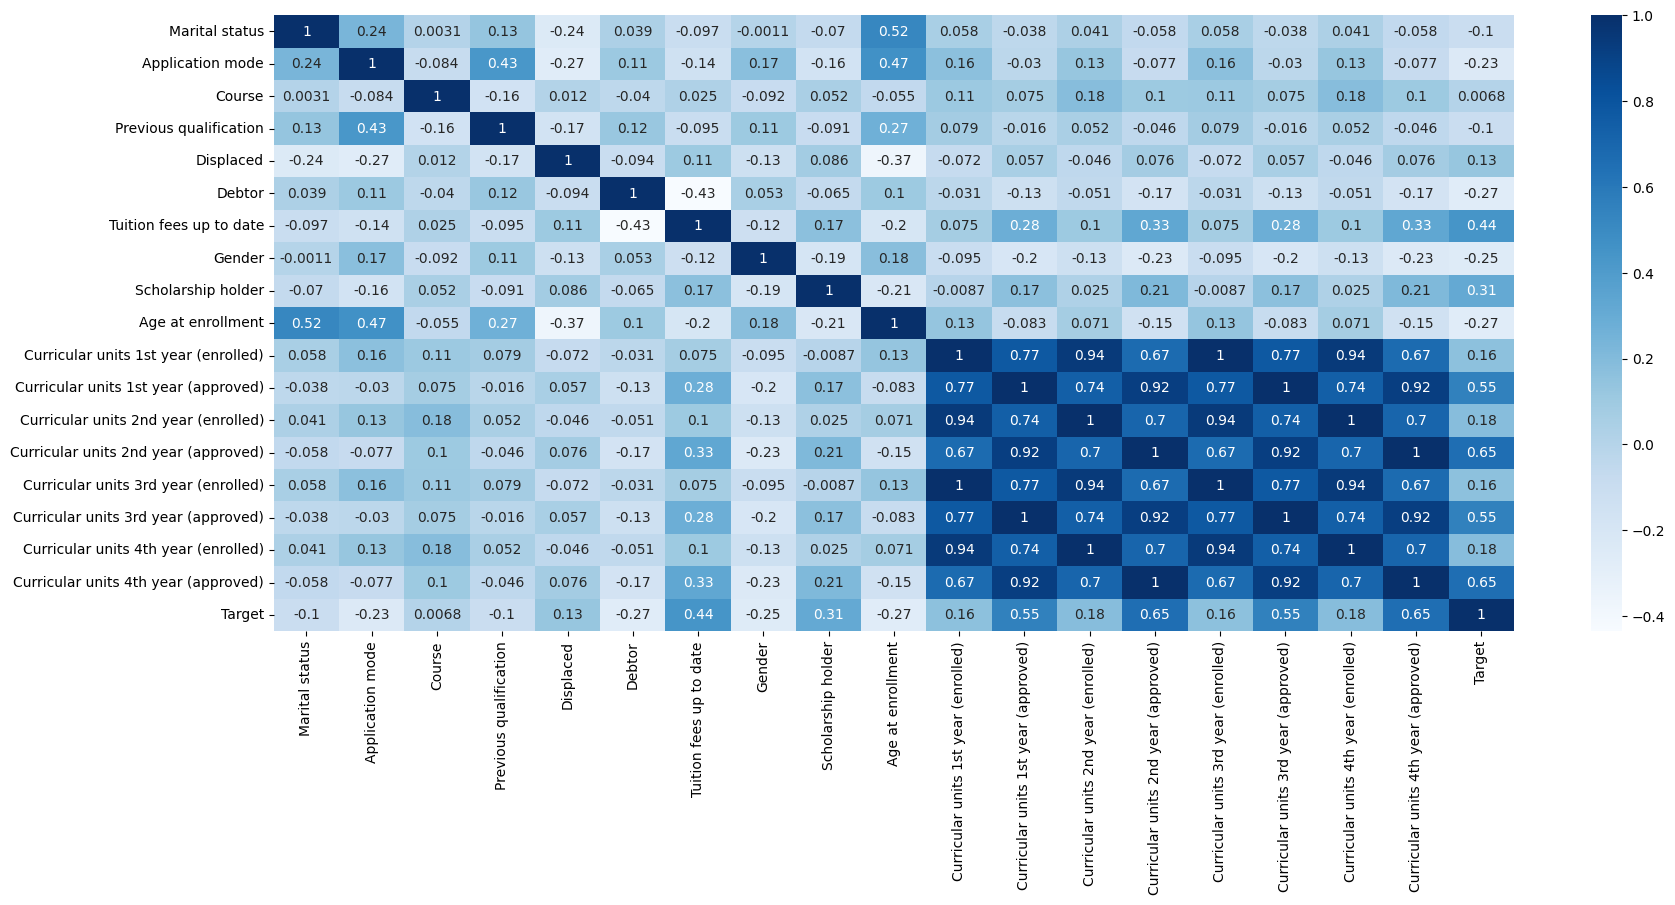

In [12]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot = True, cmap = 'Blues')
plt.plot()

In [13]:
from sklearn.model_selection import train_test_split

X = data.drop('Target', axis = 1)
Y = data['Target']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 2)

In [14]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (2904, 18)
X_test shape: (726, 18)
Y_train shape: (2904,)
Y_test shape: (726,)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score

rf_model = RandomForestClassifier(random_state=42)








In [16]:

# input_data_as_numpy_array = np.asarray(new_data)
# print(input_data_as_numpy_array)
# new_data_encoded_array = input_data_as_numpy_array.reshape(1,-1)

# print(new_data_encoded_array)

# new_predictions = rf_model.predict(new_data_encoded_array)

# print(new_predictions)



In [17]:
# # Train a Random forest model
from sklearn.metrics import accuracy_score

rf_model.fit(X_train, Y_train)

# Predict target values for training data
y_pred_train = rf_model.predict(X_test)



# Predict target values for validation data
y_pred_val = rf_model.predict(X_test)

accuracy = accuracy_score(Y_test , y_pred_val)


print(f"Accuracy of the model is: {accuracy*100}%")

r2 = r2_score(Y_test, y_pred_val)
print(f"r squared value is: {r2}")

Accuracy of the model is: 90.77134986225896%
r squared value is: 0.6129848430600311


In [18]:
# import pickle
import joblib
filename='student_dropout1.pkl'
joblib.dump(rf_model,filename)

['student_dropout1.pkl']